In [1]:
from matplotlib import pyplot as plt
import platform, os, sys, h5py
import numpy as np
from tabulate import tabulate
from pprint import pprint
from tqdm import tqdm
import glob

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\Gerwin\Documents\Code')
    from BEMHelper import interpolate_slow
else:
    sys.path.append('/mnt/s/_Data/160603 - EonHe M016v5/modules')
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    %config InlineBackend.figure_format='retina'

from Common import common, kfit
from TrapAnalysis import trap_analysis, import_data, artificial_anneal as anneal
from HeliumSurface.static_surface import *
from ipywidgets import interact

%matplotlib inline

# RC filter board with SMA connectors on both sides

This filter was really hard to pot, since it was just a tube that wasn't closed off on either side. A better way would be with a box. This is something to keep in mind when designing the RC filterboard next.

In [24]:
datapath = r"S:\_Data\180405 - New EonHe DC filters\SMA RC filter PCB with and without eccosorb"
filename = glob.glob(os.path.join(datapath, '*.csv'))
pprint(filename)

['S:\\_Data\\180405 - New EonHe DC filters\\SMA RC filter PCB with and without '
 'eccosorb\\S21_10MHZ_10GHZ_-10DBM.CSV',
 'S:\\_Data\\180405 - New EonHe DC filters\\SMA RC filter PCB with and without '
 'eccosorb\\S21_10MHZ_10GHZ_-10DBM_ WITHECCO.CSV',
 'S:\\_Data\\180405 - New EonHe DC filters\\SMA RC filter PCB with and without '
 'eccosorb\\S21_10MHZ_10GHZ_-10DBM_ WITHECCO_CURED.CSV']


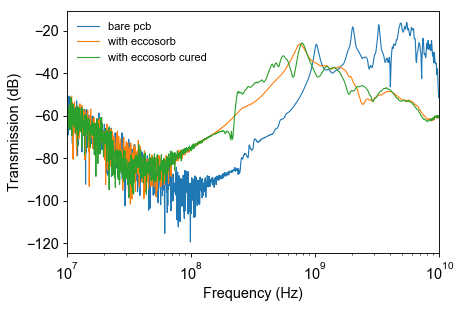

In [25]:
labels = ['bare pcb', 'with eccosorb', 'with eccosorb cured']

plt.figure(figsize=(6.,4.))
common.configure_axes(13)

for i, f in enumerate(filename): 
    data = common.load_csv(f)
    plt.plot(data[:, 0], data[:, 1], lw=1, label=labels[i])
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("Transmission (dB)")
plt.xscale('log')
plt.xlim(1E7, 1E10)
plt.legend(loc=0, frameon=False, prop={"size" : 10})

In the bare PCB data, there are a few resonances from 1-10 GHz. This is typical for lumped element components. Potting the filter in eccosorb definitely helps in making the resonances lower $Q$ and it looks like it suppresses all but the lowest resonance, which actually gets shifted down in frequency, possibly due to an increase in the dielectric constant (of the eccosorb).

The additional rise in transmission from 100 MHz - 1 GHz is probably due to broadening of the resonances. The data from 10-60 MHz is unchanged.

**Conclusion 1**: Potting must be made easier by designing a good box that facilitates potting. In addition, the self-resonance of these boards is a problem, and probably smaller capacitances will help with that. The property that dictates the self-resonance of a capacitor is called the self-L (ESL) and it also has some resistance (ESR). I haven't been able to find values for the ESL and ESR for the capacitors used here. All the manufacturer (KEMET / C0G 1812) says, is that they have "extremely low ESL/ESR". 

**Conclusion 2**: Eccosorb doesn't help below 1 GHz

In [11]:
common.get_noof_photons_in_cavity(-80-80, 4E9, 1E5)

0.1500609947309505